<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Mecanismos de Votación
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y `csv`).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción


Para esta actividad desarrollaremos un ensamble heterogéneo que prediga la popularidad o inpopularidad de contenido en línea de un sitio web. El archivo csv tiene un total de 39797 registros, donde cada uno representa características del artículo publicado en el sitio web. Cada registro tiene un total de 61 atributos que miden características del texto, cantidad de imágenes, keywords, etc. Los artículos provienen de la publicación K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal. Los artículos registrados son de la página web www.mashable.com.

Más información sobre los atributos se puede encontrar en el archivo `OnlineNewsPopularity.name`.

## Ejercicio 1: Preprocesamiento

* A continuación se le presenta un código que agrupa las variables por grupos. Cada uno de éstos hace referencia a alguna característica de los registros en la base de datos. Genere una análisis descriptivo de cada uno de los atributos. Puede utilizar la función grid_plot_batch que se encuentra en el archivo helpers.py .

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings
# Se importa libreria para el trabajo de expresiones reguilares
import re

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utiliza <strong>librería helpers.py</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [4]:
import helpers as hlp

> Cargamos la base de datos

In [5]:
# Se carga la base de datos y se elimina la columna 'Unnamed: 0' que no aporta valor al análisis.
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [6]:
# Inspeccionamos los nombres de las columnas
print([i for i in df.columns])

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [7]:
# las etiquetas de las columnas presentan un espacio extra, con ésto lo podemos eliminar
df.columns = [i.replace(' ', '') for i in df.columns]

In [8]:
print([i for i in df.columns])

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

In [9]:
df.sample(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
37100,http://mashable.com/2014/11/17/hunger-games-go...,51.0,13.0,162.0,0.691358,1.0,0.787611,14.0,2.0,1.0,1.0,5.061728,8.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,772.0,201.323750,1200.0,843300.0,383175.0,993.500000,5137.166954,3022.817085,902.0,902.0,902.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.899958,0.025000,0.025020,0.025022,0.025000,0.429075,0.133988,0.080247,0.030864,0.722222,0.277778,0.339569,0.033333,0.5,-0.186667,-0.2000,-0.166667,0.0,0.0,0.5,0.0,1700
37338,http://mashable.com/2014/11/20/barina-ad-nrma/,48.0,12.0,1640.0,0.410209,1.0,0.595528,19.0,6.0,4.0,1.0,4.864634,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.000000,0.0,843300.0,326175.0,0.000000,4294.011942,2590.122345,5700.0,5700.0,5700.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025803,0.025007,0.025003,0.025045,0.899142,0.467188,0.175226,0.045732,0.010366,0.815217,0.184783,0.356925,0.033333,0.9,-0.187862,-0.4000,-0.071429,0.0,0.0,0.5,0.0,3500
16009,http://mashable.com/2013/11/12/roomba-880-review/,422.0,8.0,261.0,0.571429,1.0,0.595628,24.0,5.0,18.0,1.0,5.157088,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,525.0,128.222222,5500.0,843300.0,395900.0,1341.804878,6089.276625,3647.871244,4800.0,6900.0,5850.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022225,0.022361,0.144485,0.568972,0.241957,0.465565,0.157748,0.022989,0.007663,0.750000,0.250000,0.337121,0.100000,1.0,-0.143750,-0.1875,-0.100000,0.0,0.0,0.5,0.0,441000
23983,http://mashable.com/2014/04/23/antarctic-lava-...,260.0,10.0,204.0,0.675393,1.0,0.768657,11.0,2.0,10.0,0.0,4.916667,10.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,3400.0,507.000000,3400.0,843300.0,287410.0,2093.587413,8308.624769,4537.964900,1300.0,1300.0,1300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.114951,0.514582,0.020001,0.330247,0.020218,0.357639,0.059028,0.034314,0.024510,0.583333,0.416667,0.326623,0.100000,1.0,-0.418333,-1.0000,-0.050000,0.0,0.0,0.5,0.0,1200
4866,http://mashable.com/2013/04/04/facebook-chat-h...,644.0,10.0,289.0,0.531250,1.0,0.672414,5.0,5.0,16.0,1.0,4.508651,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,428.0,266.800000,0.0,617900.0,180100.0,0.000000,4251.352490,2773.207042,1500.0,5400.0,4100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.201875,0.033345,0.033449,0.033392,0.697939,0.384626,0.181907,0.034602,0.003460,0.909091,0.090909,0.314242,0.033333,0.8,-0.050000,-0.0500,-0.050000,0.0,0.0,0.5,0.0,979


In [10]:
# eliminamos el string de url que no sirve para el análisis
df.drop(columns='url', inplace=True)

In [11]:
# generamos el conjunto de variables
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"), axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

* Describa el comportamiento de las variables.

> qnty

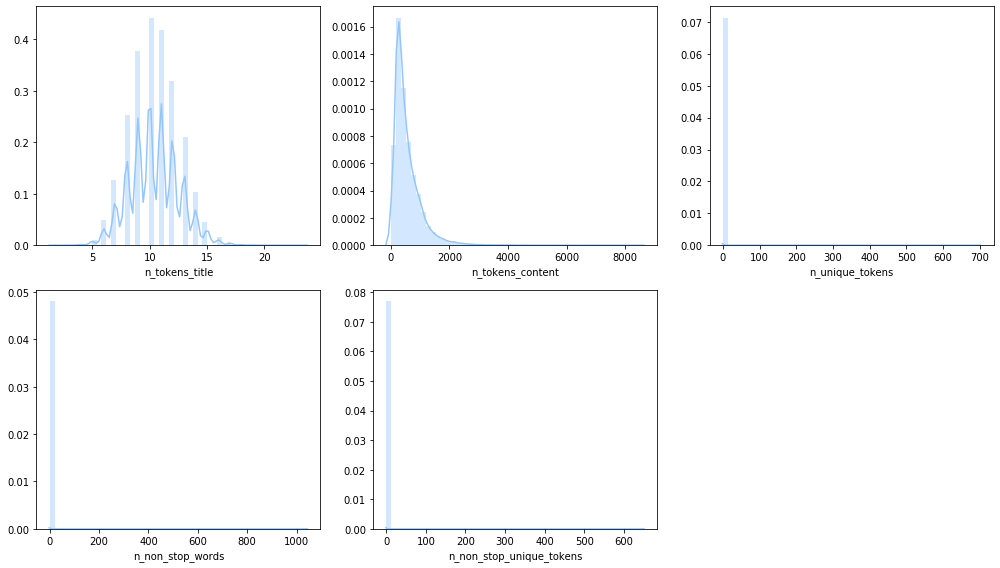

In [12]:
hlp.grid_plot_batch(qnty, 3, sns.distplot)

Podemos ver que la distribución de "número de palabras en el título (__n_tokens_title__)" tiene una forma normal con media en torno a las 10 palabras.

El caso de "número de palabras en el cuerpo (__n_tokens_content__)" está desbalanceado en torno a 0, lo que nos tienta a aplicar logaritmo a la variable, no obstante la dejaremos como tal.

Para el caso de __n_unique_tokens__, __n_non_stop_words__, __n_non_stop_unique_tokens__ vemos una fuerte carga en 0 y una correlación aparente entre las variables.

> channel

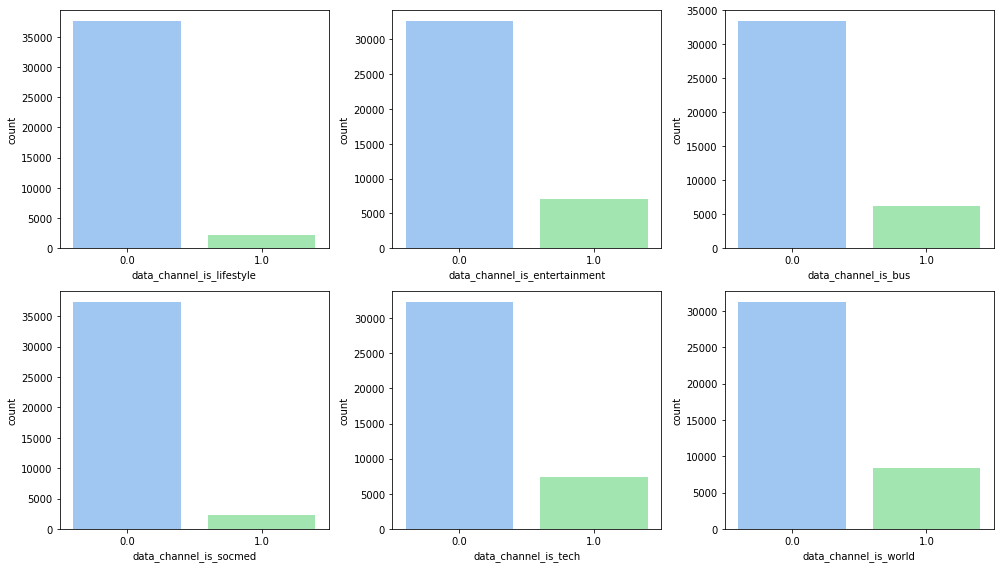

In [14]:
hlp.grid_plot_batch(channel, 3, sns.countplot)

El grupo de atributos __channel__ son variables binarias y representan una temática en particular. No podemos determinar visualmente una correlación, pero más adelante vamos a revisarlo.

> days

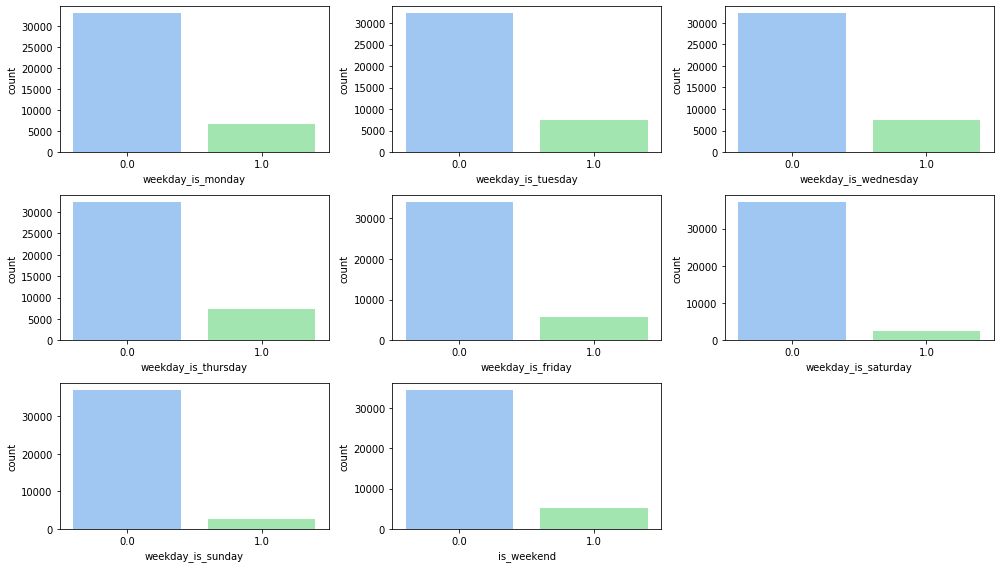

In [16]:
hlp.grid_plot_batch(days, 3, sns.countplot)

El grupo de atributos __days__ son variables binarias e indican el día de la semana que fue publicado el artículo. No podemos determinar visualmente una correlación, pero más adelante vamos a revisarlo.

In [48]:
# Revisamos si los artículos se publican más de 1 vez
cantidad = [0, 0, 0, 0]
for rowname, row in days.iterrows():
    if np.sum(row)==0:
        cantidad[0] += 1
    elif np.sum(row)==1:
        cantidad[1] += 1
    elif np.sum(row)==2:
        cantidad[2] += 1
    else:
        cantidad[3] += 1

for index, cant in enumerate(cantidad):
    print(f"{cant} articulos se publicaron {index} veces")

0 articulos se publicaron 0 veces
34454 articulos se publicaron 1 veces
5190 articulos se publicaron 2 veces
0 articulos se publicaron 3 veces


Dado que no se repiten más de 1 vez la publicación descartamos correlación en estas variables, no obstante vamos a revisar en detalle la correlación en el punto siguiente.

> sentiments

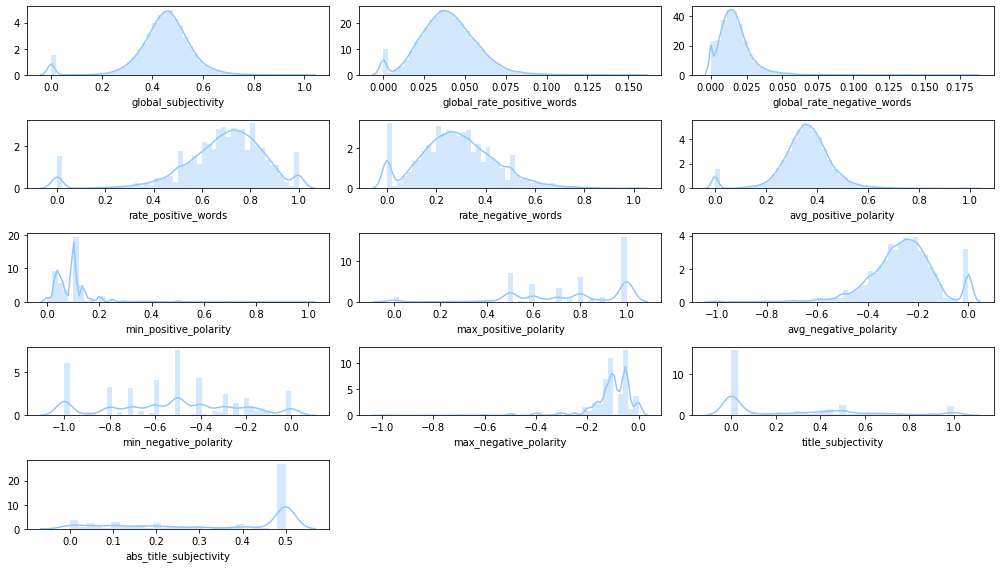

In [17]:
hlp.grid_plot_batch(sentiments, 3, sns.distplot)

* Dada la naturaleza de los atributos, es probable que algunas mediciones estén correlacionadas entre sí. Para ello, genere un diagnóstico previo de multicolinealidad utilizando la función identify_high_correlations que se encuentra en el archivo helpers.py . Para todos aquellos atributos que tengan una correlación de .8, reporte sus nombres.
* Antes de generar los conjuntos de entrenamiento y validación, preprocese los datos con los siguientes pasos:
  * Recodifique la variable shares en una variable binaria que identifique como 1 todos los registros con más de 1400 "compartir" y 0 de lo contrario. Para evitar multicolinealidad, elimine la variable shares posteriormente.
  * Elimine todas las variables que presentaban una correlación mayor a .8. Este paso es para evitar la multicolinealidad de los atributos.
  * Genere un análisis de Componentes Principales para extraer las principales 30 dimensiones. Guarde estas dimensiones en un nuevo objeto.
